/tmp/ipykernel_203452/1300156010.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


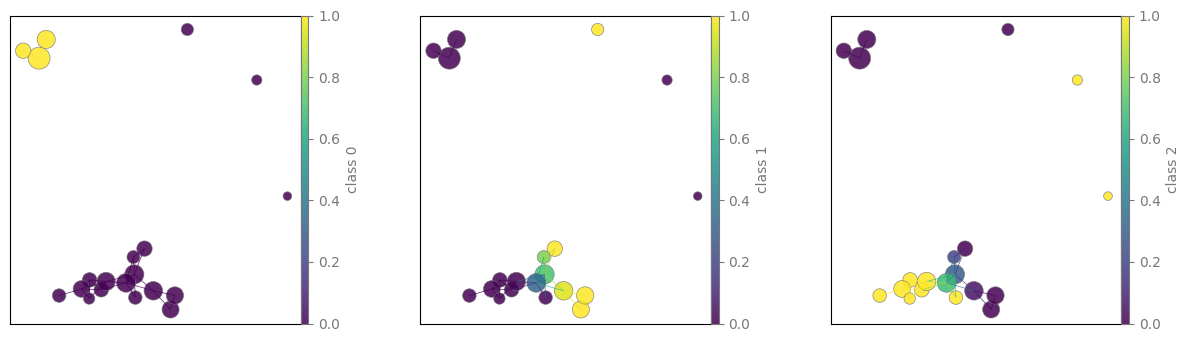

In [3]:
from sklearn.datasets import load_iris

from mapper.core import *
from mapper.cover import *
from mapper.clustering import *
from mapper.plot import *

import matplotlib

iris_data = load_iris()
iris_data
X = iris_data.data
y = iris_data.target

cover_algo = BallCover(radius=0.7, metric=lambda x, y: np.linalg.norm(x - y))
mapper_algo = MapperAlgorithm(cover=cover_algo, clustering=TrivialClustering())
mapper_graph = mapper_algo.build_graph(X)
mapper_plot = MapperPlot(X, mapper_graph)

fig, axs = plt.subplots(1, 3, figsize=(15, 4))
for c in range(3):
    mapper_plot.with_colors(colors=[1 if x == c else 0 for x in list(y)]).plot(axs[c], 'matplotlib', 512, 512, f'class {c}')
fig.show()
